In [2]:
# New code - recreate PolyQueryPeacocks

import numpy as np
import pathlib

import ssl
ssl._create_default_https_context = ssl._create_unverified_context # try and avoid SSL error

In [3]:
from sisap2023.utils.mirflickr  import load_encodings

allData = load_encodings(pathlib.Path("/Volumes/Data/mf_resnet50/")) # load resnet 50 encodings

smData = load_encodings(pathlib.Path("/Volumes/Data/mf_alexnet_softmax"))

In [4]:

from sisap2023.utils.count_cats import findHighCatValues

top_indices, top_cats = findHighCatValues(smData) # numpy - the most owly owls etc.
top_cats = top_cats.tolist()  # a python list

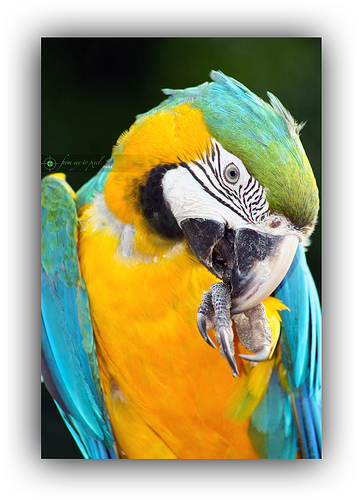

In [5]:
from sisap2023.utils.mirflickr import get_mf_image

get_mf_image(top_indices[0])

In [6]:
# Download ImageNet labels

! if [ -f "imagenet_classes.txt" ]; then echo "File imagenet_classes.txt already exists"; else wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt 2> /dev/null; fi


File imagenet_classes.txt already exists


In [7]:
# Read the categories
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]

In [8]:
for i in range(40):
    print(top_indices[i],smData[top_indices[i],top_cats[i]],top_cats[i],categories[top_cats[i]] )

676078 1.0 88 macaw
27961 1.0 134 crane
726967 1.0 388 giant panda
694515 1.0 84 peacock
274217 1.0 565 freight car
981885 1.0 145 king penguin
255348 1.0 84 peacock
583538 1.0 958 hay
243285 1.0 84 peacock
46730 1.0 84 peacock
110844 1.0 97 drake
440457 1.0 958 hay
752195 1.0 84 peacock
587997 1.0 84 peacock
748778 1.0 84 peacock
178384 1.0 387 lesser panda
81246 1.0 134 crane
745319 1.0 84 peacock
71826 1.0 84 peacock
545163 1.0 88 macaw
659380 1.0 576 gondola
851476 1.0 97 drake
839037 1.0 84 peacock
992142 1.0 145 king penguin
829162 1.0 565 freight car
255248 1.0 565 freight car
97035 1.0 97 drake
820188 1.0 84 peacock
679724 1.0 387 lesser panda
698238 1.0 388 giant panda
714173 1.0 42 agama
117053 1.0 84 peacock
917798 1.0 97 drake
984174 1.0 145 king penguin
897381 1.0 87 African grey
881812 1.0 130 flamingo
186776 1.0 387 lesser panda
991537 1.0 145 king penguin
339677 1.0 565 freight car
452222 1.0 291 lion


In [9]:
def findCatsWithCountMoreThan(n,smData,thresh):
    vals = np.max(smData,axis=1) # 0 is rows, vals is the highest value in each row
    highest_labels_per_row = np.argmax(smData,axis=1) # the index of the highest value in each row
    highly_categorised_indices = highest_labels_per_row[vals>thresh] # the class indices of the images with category > thresh
    # now get rid of those that are less than n
    unique, counts = np.unique(highly_categorised_indices, return_counts=True) # get the unique category indices and their counts
    filtered = unique[counts>n] 
    return filtered

def findCatsWithCountMoreThanLessThan(n,k,smData,thresh):
    vals = np.max(smData,axis=1) # 0 is rows, vals is the highest value in each row
    highest_labels_per_row = np.argmax(smData,axis=1) # the index of the highest value in each row
    highly_categorised_indices = highest_labels_per_row[vals > thresh] # the class indices of the images with category > thresh
    # now get rid of those that are less than n
    unique, counts = np.unique(highly_categorised_indices, return_counts=True) # get the unique category indices and their counts
    filtered = unique[(counts>n)&(counts<k)] 
    filtered_counts = counts[(counts>n)&(counts<k)]
    return filtered,filtered_counts

def findTopCats(smData,thresh):
    vals = np.max(smData,axis=1) # 0 is rows, vals is the highest value in each row

    column_totals = np.sum(smData,axis=0) # The totals of all the columns - what are the biggest categories?
    indices_of_most_categorical = np.argsort(column_totals)[::-1][:20] # reverse the and take the first 20

    highest_labels_per_row = np.argmax(smData,axis=1) # colum vect - the index of the highest value in each row
    data_above_thresh = smData[vals>thresh] # the class indices of the images with category > thresh

   # Need to count the entries that are in data_above_thresh and whose categories are in indices_of_most_categorical

    cats_in_most_categorical = np.isin(indices_of_most_categorical,highest_labels_per_row)
    top_cats_counts = smData[cats_in_most_categorical] # those rows in the most categorical
    top_cats_counts[vals>thresh] # those rows well categories

    return indices_of_most_categorical,top_cats_counts

# cats_more_than_n = findCatsWithCountMoreThan(200,smData,0.99)
# print(cats_more_than_n)

# for i in cats_more_than_n:
#     print(categories[i]) # show categories of the most categorical images

cats_between,counts = findCatsWithCountMoreThanLessThan(80,100,smData,0.80) # a tuple of two np arrays filtered and filtered counts

for index,cat in enumerate(cats_between):
    print(categories[cat],counts[index]) # show categories of the most categorical images
print("count = ",counts.size)



indigo bunting 90
common iguana 86
ptarmigan 81
red-breasted merganser 84
sea slug 88
white stork 87
spoonbill 86
American coot 84
oystercatcher 84
Pembroke 87
leopard 92
jaguar 90
mantis 96
ram 95
otter 85
orangutan 82
macaque 94
accordion 89
aircraft carrier 90
basketball 81
beach wagon 97
beer bottle 84
canoe 88
crash helmet 88
drilling platform 91
electric guitar 87
fur coat 93
jersey 89
kimono 93
mailbox 81
maypole 90
mobile home 84
mountain tent 88
paddlewheel 96
pole 86
police van 98
pot 90
racket 82
running shoe 94
slot 87
sock 97
swimming trunks 89
tank 82
trifle 85
artichoke 87
lemon 86
groom 95
coral fungus 83
count =  48
